In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
# !gdown 1yFdydxUQHeedunO7IyHKVDwkGcIrJ3DR
# !gdown 1dKMQNv_G2Y-n4xw2UzNax4cxtqozt8gB
# !gdown 1z0LGZ-bWbVDVIV7eAE9OgoJrasoLz0D3
# !gdown 1T4bBI7nA9k8UgMP2e_RYIo0Q8hiQ0AJm

Downloading...
From: https://drive.google.com/uc?id=1yFdydxUQHeedunO7IyHKVDwkGcIrJ3DR
To: /content/Compact.csv
100% 15.1k/15.1k [00:00<00:00, 23.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1dKMQNv_G2Y-n4xw2UzNax4cxtqozt8gB
To: /content/Skewed.csv
100% 35.0k/35.0k [00:00<00:00, 55.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1z0LGZ-bWbVDVIV7eAE9OgoJrasoLz0D3
To: /content/wellSeperated.csv
100% 12.1k/12.1k [00:00<00:00, 31.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1T4bBI7nA9k8UgMP2e_RYIo0Q8hiQ0AJm
To: /content/Subclusters.csv
100% 15.2k/15.2k [00:00<00:00, 41.2MB/s]


In [3]:
Compact = pd.read_csv("Compact.csv")
Skewed = pd.read_csv("Skewed.csv")
Subclusters = pd.read_csv("Subclusters.csv")
wellSeperated = pd.read_csv("wellSeperated.csv")

In [4]:
Compact

,x1,x2
0,-50.298667,31.489949
1,-45.591237,35.838229
2,-52.628892,35.305813
3,-52.813231,36.767548
4,-48.468811,29.755084
...,...,...
395,7.280400,-28.095825
396,5.417914,-25.709368
397,5.332784,-29.247372
398,10.450552,-28.943048


In [5]:
Compact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      400 non-null    float64
 1   x2      400 non-null    float64
dtypes: float64(2)
memory usage: 6.4 KB


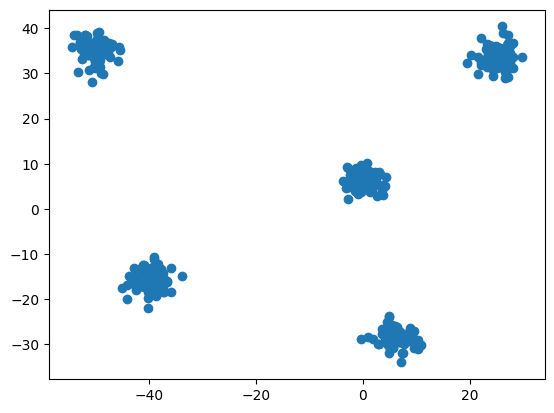

In [6]:
plt.scatter(Compact["x1"], Compact["x2"])

In [7]:
Skewed

,x1,x2
0,-0.450040,11.207204
1,-1.065648,-1.923373
2,0.829499,-1.000498
3,-1.551968,7.645688
4,-2.721162,1.393759
...,...,...
920,8.741722,-7.770710
921,11.659674,-12.801774
922,10.228386,-12.195185
923,8.244155,-9.419570


In [8]:
Skewed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      925 non-null    float64
 1   x2      925 non-null    float64
dtypes: float64(2)
memory usage: 14.6 KB


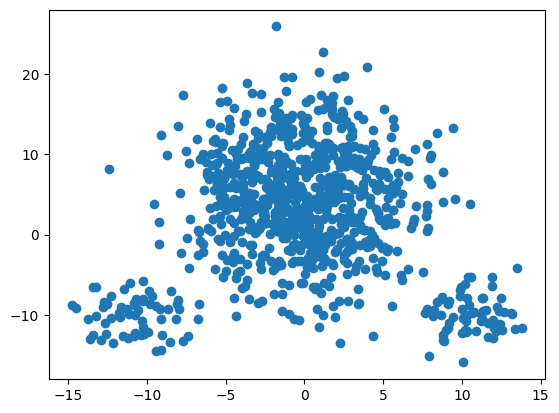

In [9]:
plt.scatter(Skewed["x1"], Skewed["x2"])

In [10]:
Subclusters

,x1,x2
0,-14.952995,-0.285601
1,-17.406881,3.495200
2,-14.122142,0.712242
3,-16.968327,-0.860050
4,-15.837062,4.610789
...,...,...
395,25.477087,10.963249
396,26.694292,11.276599
397,28.137247,14.511407
398,22.612999,12.285449


In [11]:
Subclusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      400 non-null    float64
 1   x2      400 non-null    float64
dtypes: float64(2)
memory usage: 6.4 KB


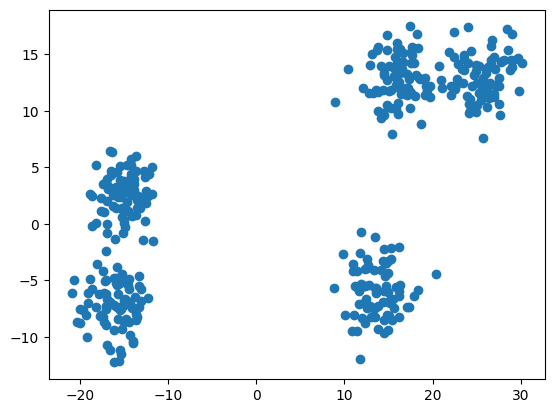

In [12]:
plt.scatter(Subclusters["x1"], Subclusters["x2"])

In [13]:
wellSeperated

,x1,x2
0,516.012706,393.014514
1,436.211762,408.656585
2,512.052601,372.022014
3,489.140464,401.807159
4,446.207986,338.516682
...,...,...
330,638.916471,323.569096
331,542.005901,347.527070
332,611.964612,377.254978
333,520.654168,455.996453


In [14]:
wellSeperated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      335 non-null    float64
 1   x2      335 non-null    float64
dtypes: float64(2)
memory usage: 5.4 KB


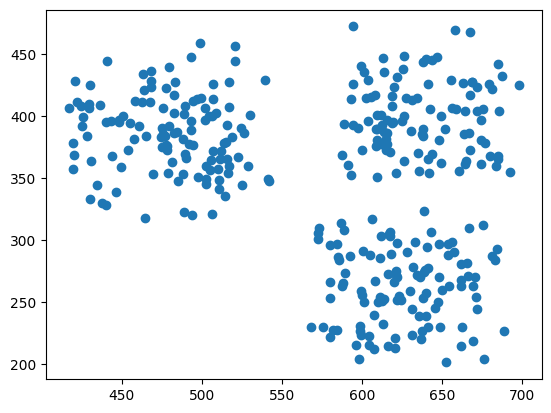

In [15]:
plt.scatter(wellSeperated["x1"], wellSeperated["x2"])

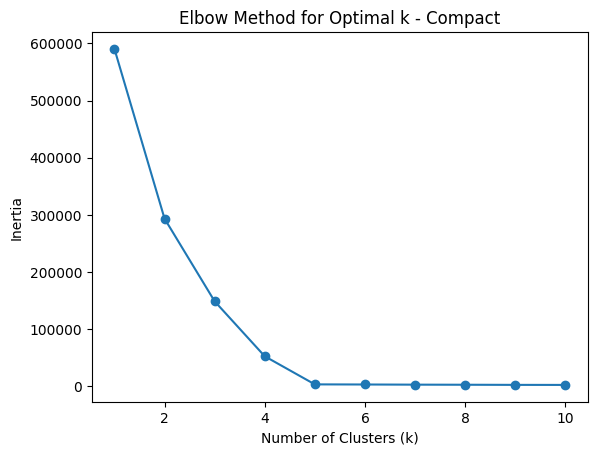

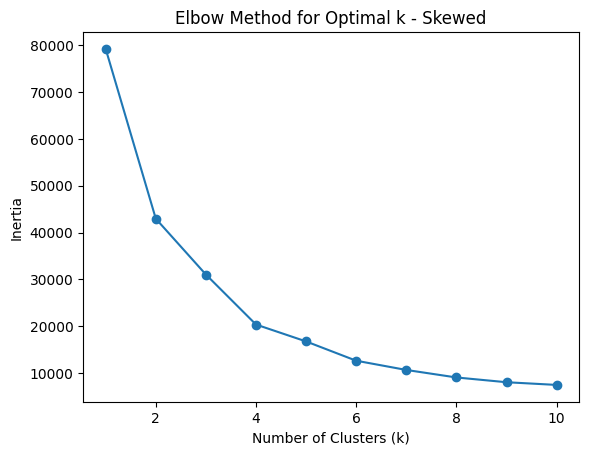

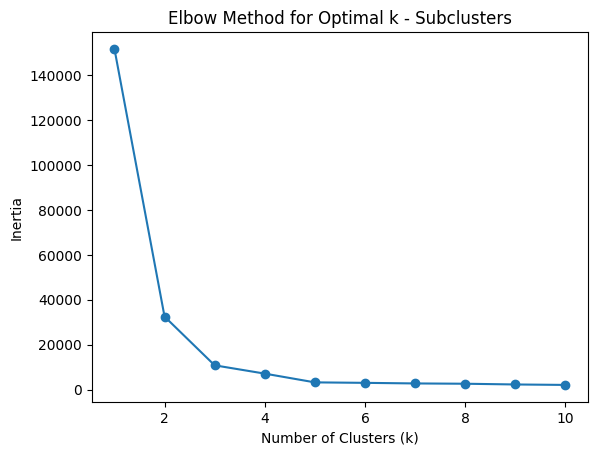

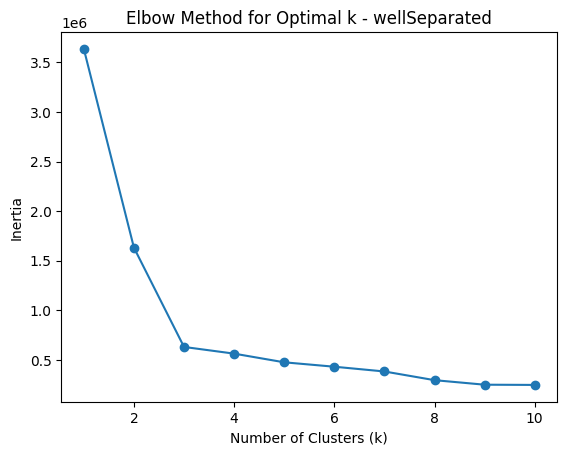

In [16]:
def plot_kmeans_elbow_curve(data, dataset_label, max_clusters=10):
    """Plots the elbow curve for K-Means clustering to find the optimal number of clusters."""
    inertia_values = []
    for num_clusters in range(1, max_clusters + 1):
        kmeans_model = KMeans(n_clusters=num_clusters, init='k-means++')
        kmeans_model.fit(data)
        inertia_values.append(kmeans_model.inertia_)

    plt.plot(range(1, max_clusters + 1), inertia_values, marker='o')
    plt.title(f'Elbow Method for Optimal k - {dataset_label}')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.show()

# Plot elbow curves for each dataset
dataset_labels = ['Compact', 'Skewed', 'Subclusters', 'wellSeparated']
plot_kmeans_elbow_curve(Compact, dataset_labels[0])
plot_kmeans_elbow_curve(Skewed, dataset_labels[1])
plot_kmeans_elbow_curve(Subclusters, dataset_labels[2])
plot_kmeans_elbow_curve(wellSeperated, dataset_labels[3])

In [17]:
# Define datasets and parameters
datasets = [Compact, Skewed, Subclusters, wellSeperated]
optimal_clusters_per_dataset = [5, 4, 4, 3]

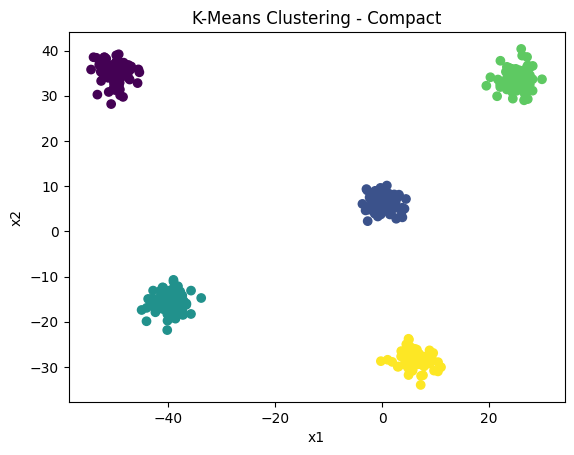

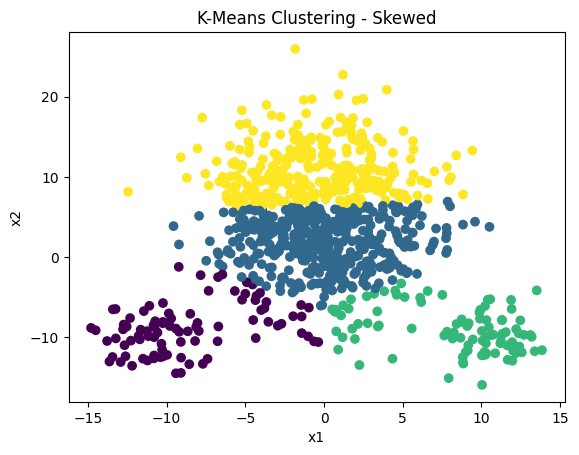

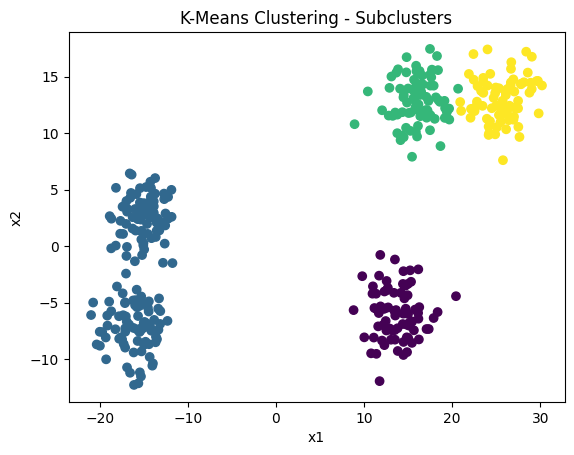

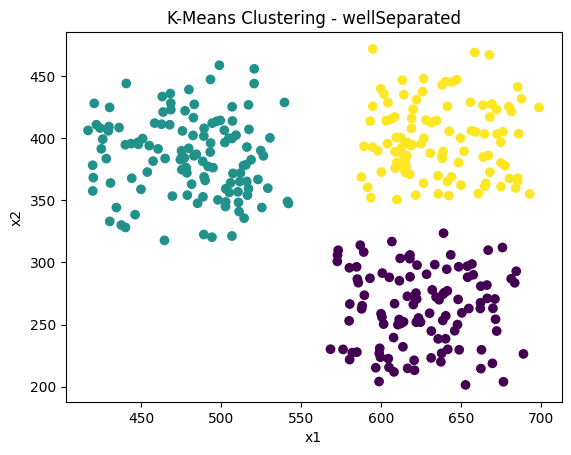

In [18]:
# Perform K-Means clustering and calculate silhouette scores
kmeans_silhouette_scores = []
for data, label, optimal_clusters in zip(datasets, dataset_labels, optimal_clusters_per_dataset):
    kmeans_model = KMeans(n_clusters=optimal_clusters)
    kmeans_model.fit(data[['x1', 'x2']])
    silhouette_avg = silhouette_score(data[['x1', 'x2']], kmeans_model.labels_)
    kmeans_silhouette_scores.append(silhouette_avg)

    plt.scatter(data['x1'], data['x2'], c=kmeans_model.labels_)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'K-Means Clustering - {label}')
    plt.show()

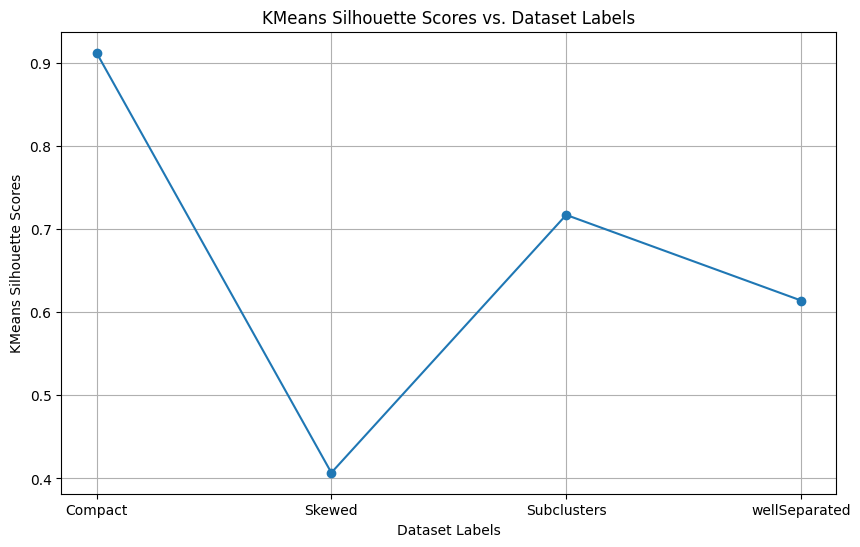

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(dataset_labels, kmeans_silhouette_scores, marker='o')
plt.xlabel("Dataset Labels")
plt.ylabel("KMeans Silhouette Scores")
plt.title("KMeans Silhouette Scores vs. Dataset Labels")
plt.grid(True)
plt.show()

KMeans Clustering (Compact Data):
Clusters are spherical and equally sized so it is performing optimally.

KMeans Clustering (Skewed Data):
The algorithm fails in this case primarily due to its assumption that clusters are spherical and equally sized.

KMeans Clustering (SubClusters Data):
It assigns points to the nearest centroid, some more clusters could be created but arent, so it is performing sub-optimally.

KMeans Clustering (wellSeperated Data):
Works well as clusters are well-separated and have roughly equal sizes.

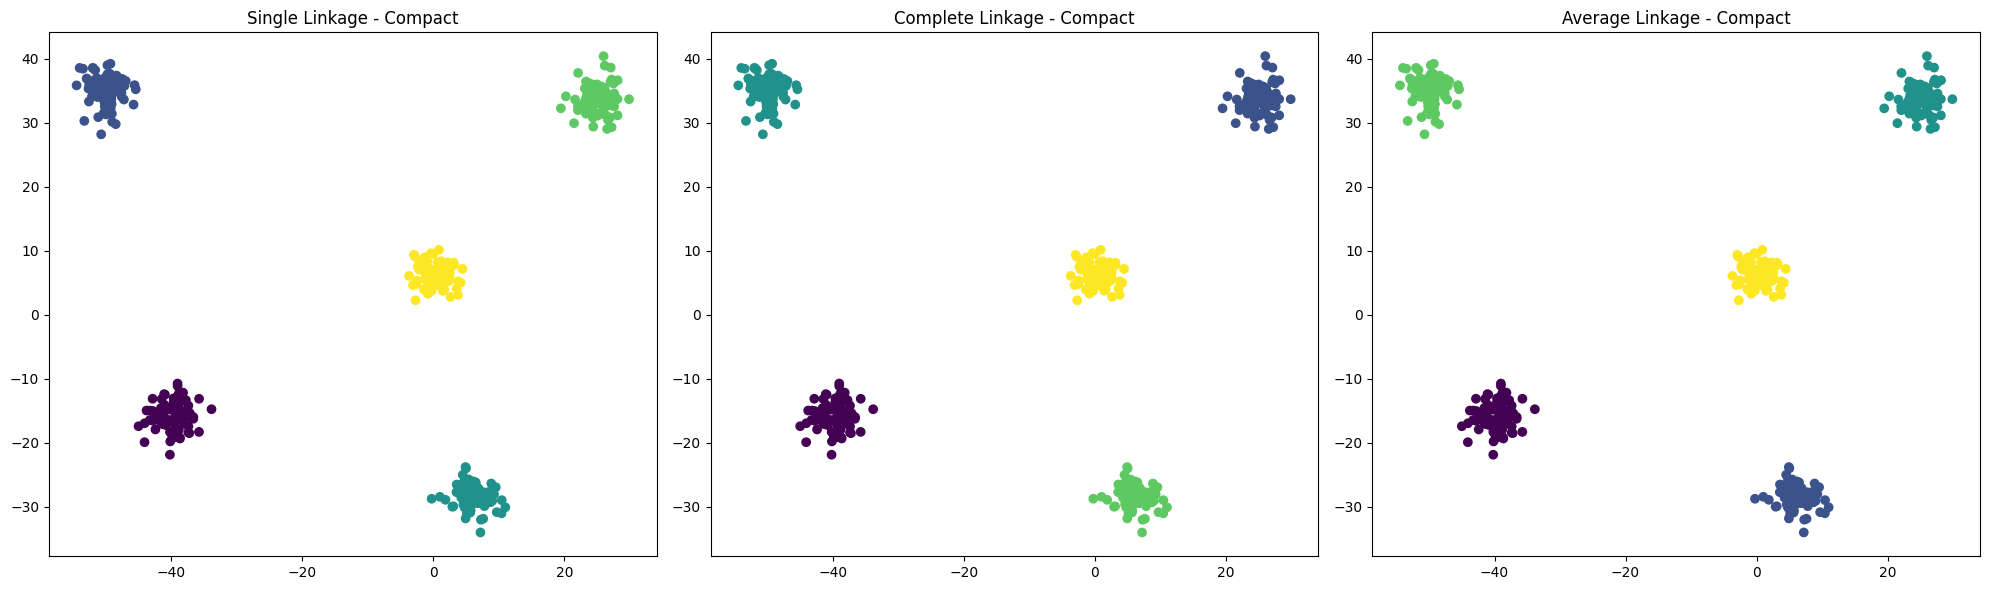

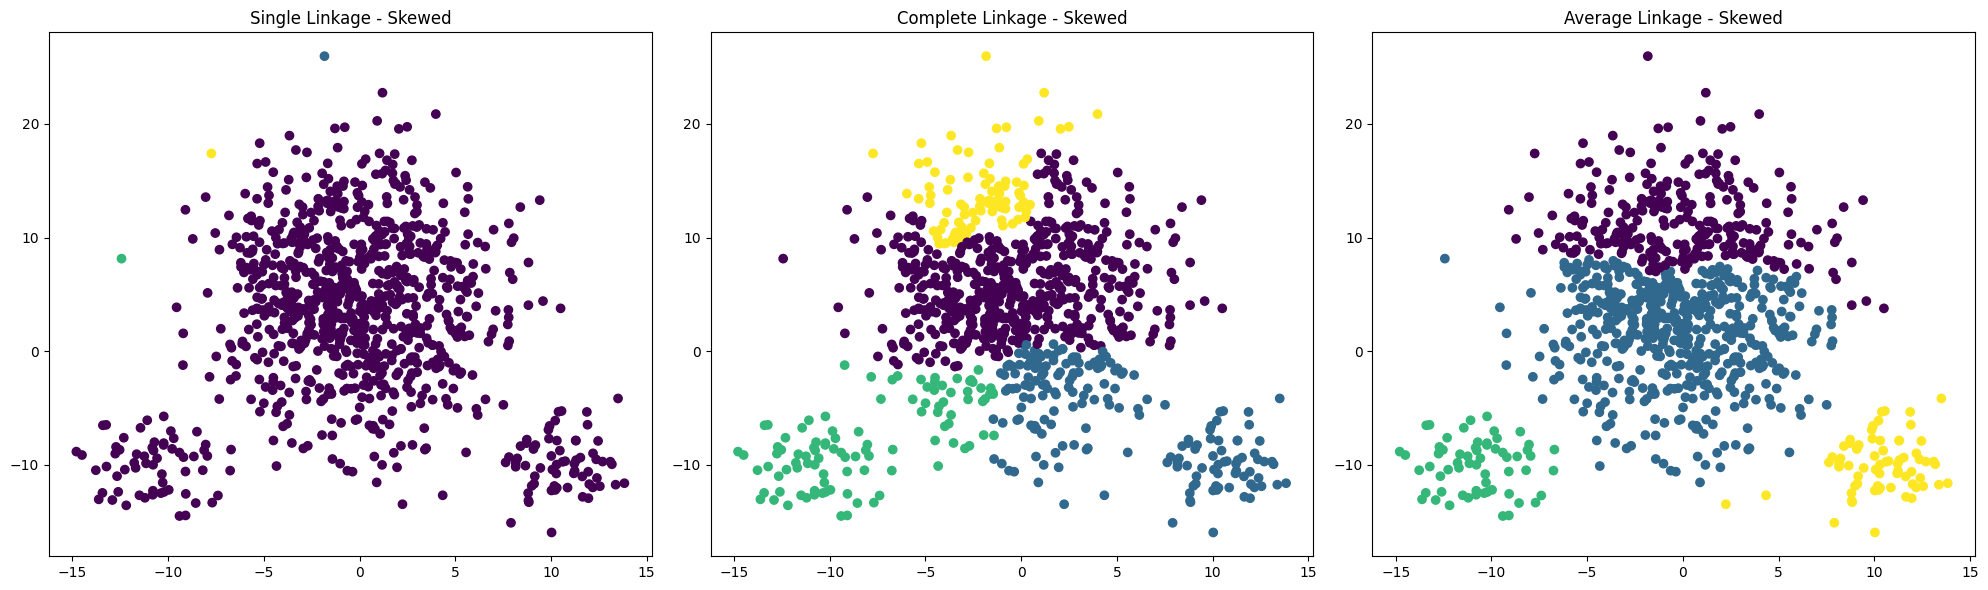

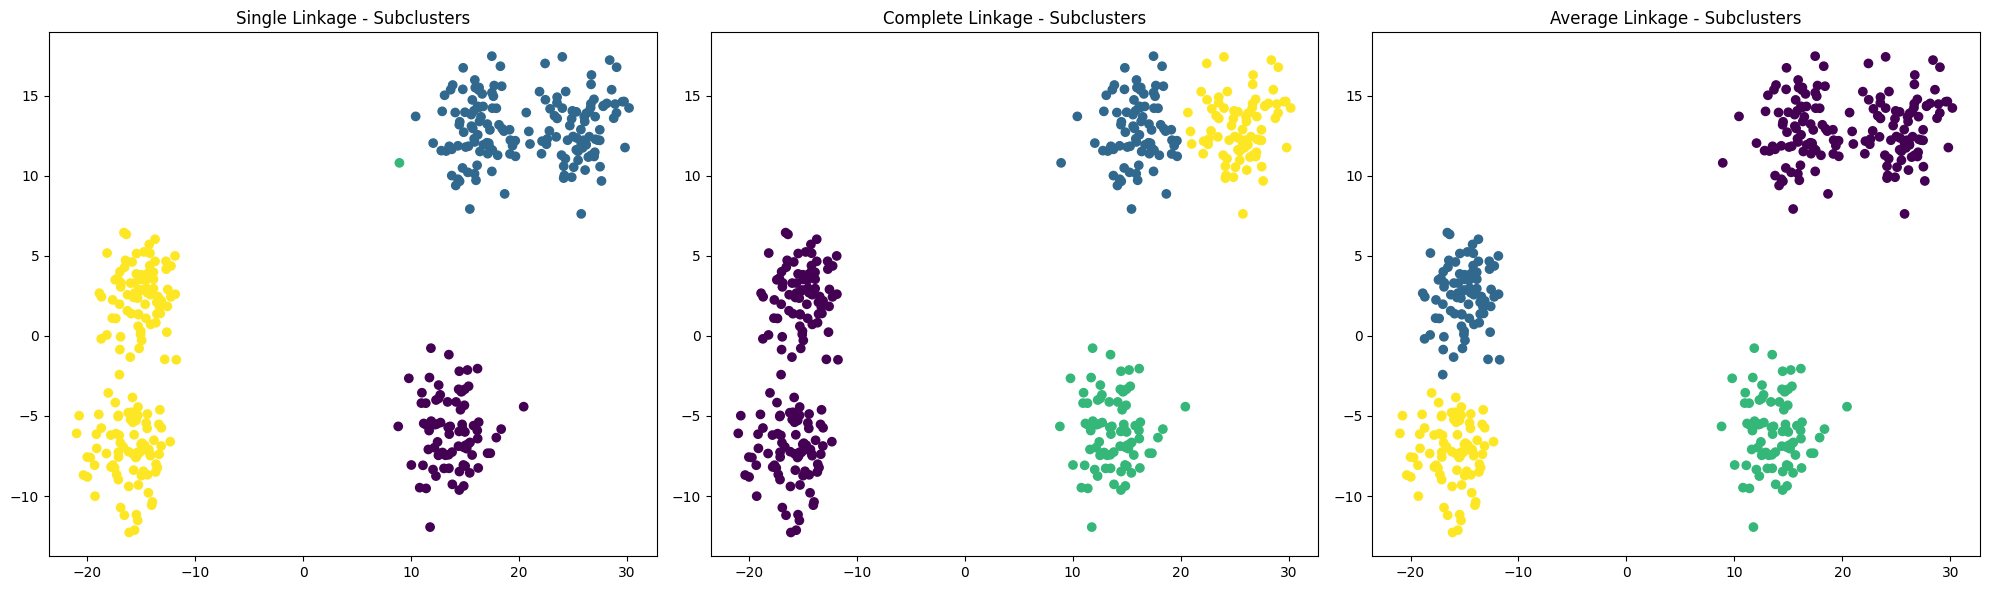

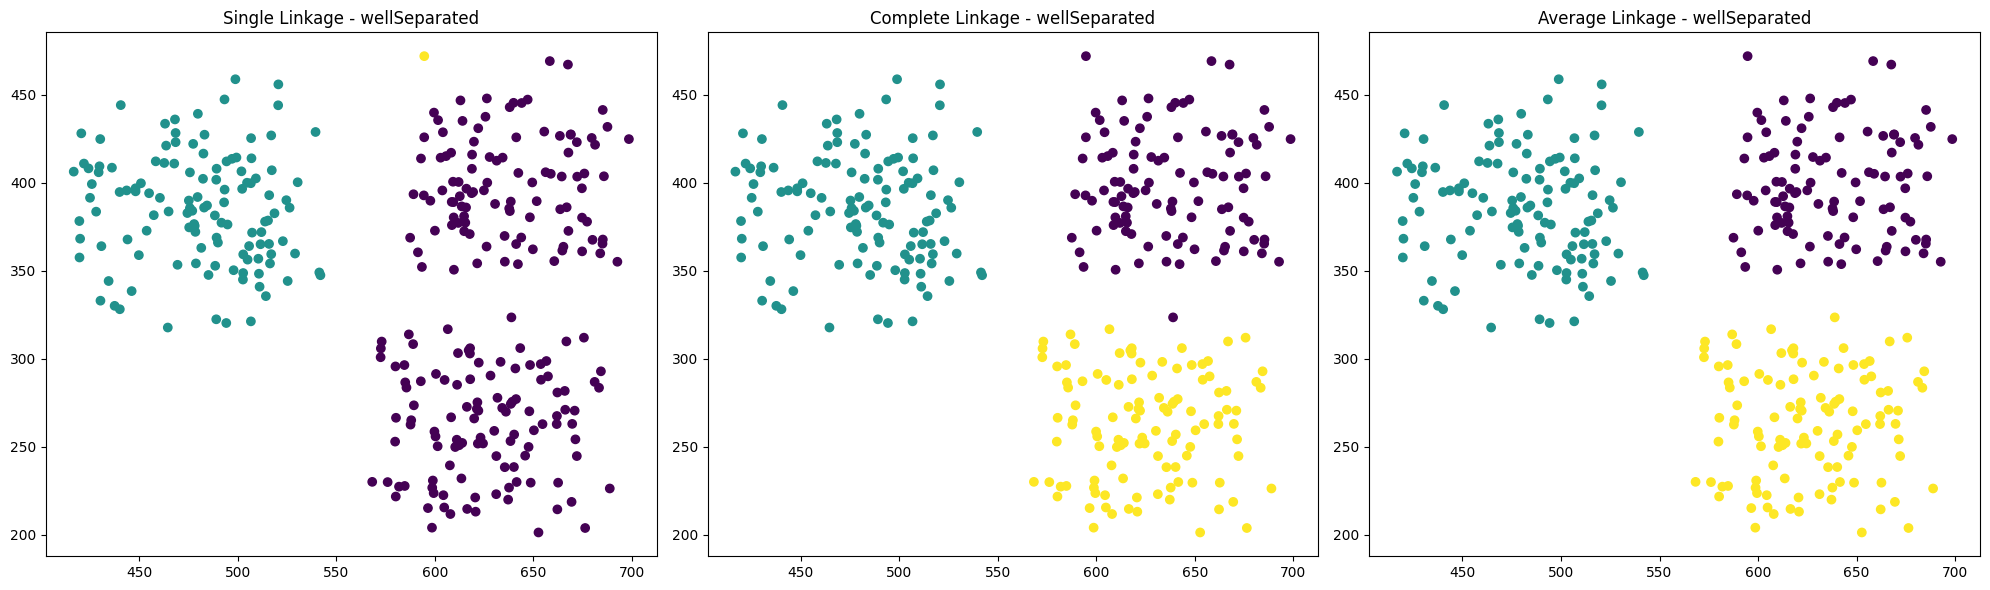

In [20]:
# Agglomerative clustering with different linkage methods
single_linkage_scores, complete_linkage_scores, average_linkage_scores = [], [], []

for data, label, optimal_clusters in zip(datasets, dataset_labels, optimal_clusters_per_dataset):
    single_linkage_model = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='single')
    complete_linkage_model = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='complete')
    average_linkage_model = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='average')

    single_linkage_model.fit(data[['x1', 'x2']])
    complete_linkage_model.fit(data[['x1', 'x2']])
    average_linkage_model.fit(data[['x1', 'x2']])

    single_linkage_scores.append(silhouette_score(data[['x1', 'x2']], single_linkage_model.labels_))
    complete_linkage_scores.append(silhouette_score(data[['x1', 'x2']], complete_linkage_model.labels_))
    average_linkage_scores.append(silhouette_score(data[['x1', 'x2']], average_linkage_model.labels_))

    # Plot agglomerative clustering results
    plt.figure(figsize=(20, 6))

    plt.subplot(131)
    plt.scatter(data['x1'], data['x2'], c=single_linkage_model.labels_)
    plt.title(f'Single Linkage - {label}')

    plt.subplot(132)
    plt.scatter(data['x1'], data['x2'], c=complete_linkage_model.labels_)
    plt.title(f'Complete Linkage - {label}')

    plt.subplot(133)
    plt.scatter(data['x1'], data['x2'], c=average_linkage_model.labels_)
    plt.title(f'Average Linkage - {label}')

    plt.tight_layout()
    plt.show()

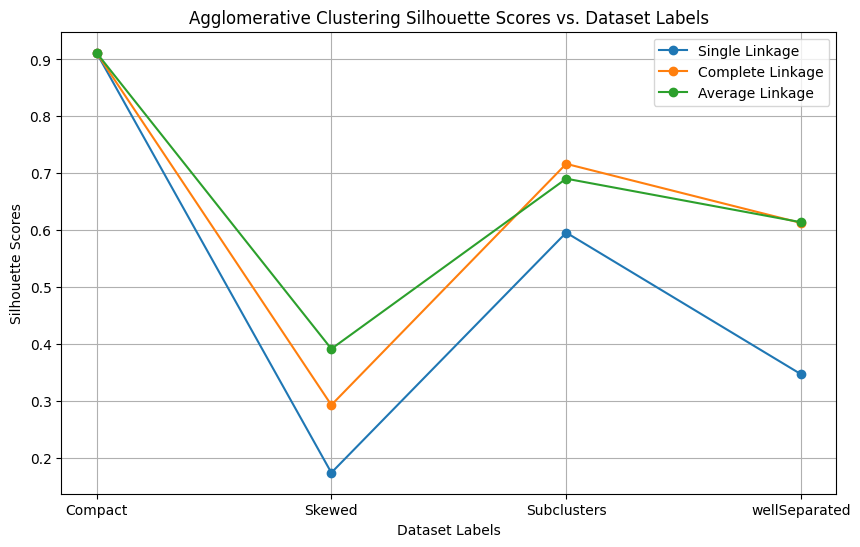

In [37]:
# prompt: plot single_linkage_scores, complete_linkage_scores, average_linkage_scores vs dataset_labels

plt.figure(figsize=(10, 6))
plt.plot(dataset_labels, single_linkage_scores, marker='o', label='Single Linkage')
plt.plot(dataset_labels, complete_linkage_scores, marker='o', label='Complete Linkage')
plt.plot(dataset_labels, average_linkage_scores, marker='o', label='Average Linkage')

plt.xlabel("Dataset Labels")
plt.ylabel("Silhouette Scores")
plt.title("Agglomerative Clustering Silhouette Scores vs. Dataset Labels")
plt.grid(True)
plt.legend()
plt.show()

Aggloromative Clustering (Compact Data):
Works well especially with complete or average linkage, which consider the maximum or average distance between clusters, respectively.

Aggloromative Clustering (Skewed Data):
Similar to KMeans, it struggles with skewed clusters.

Aggloromative Clustering (SubClusters Data):
Works well especially if linkage strategies consider the average or complete distance between clusters.

Aggloromative Clustering (wellSeperated Data):
Performs well for well-separated clusters, especially with single or complete linkage.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


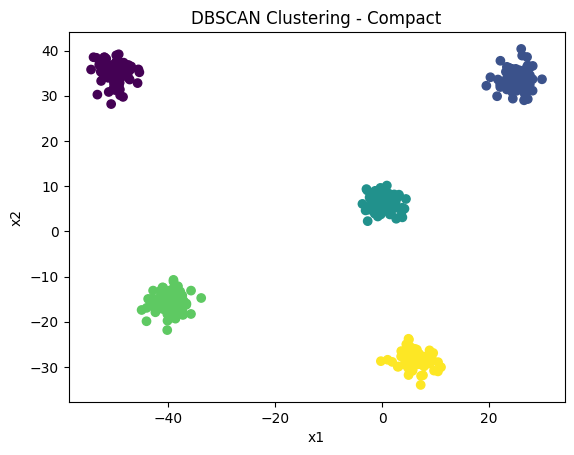

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

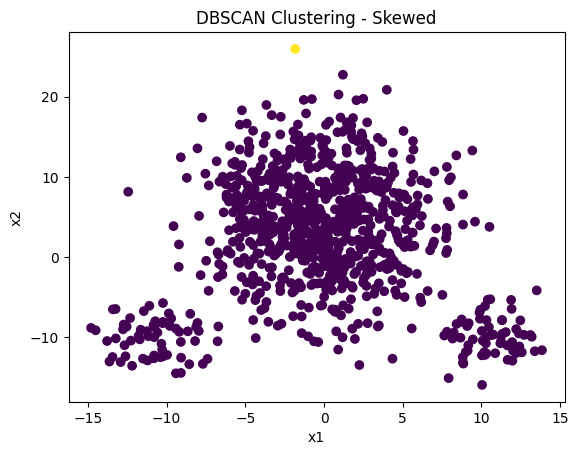

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


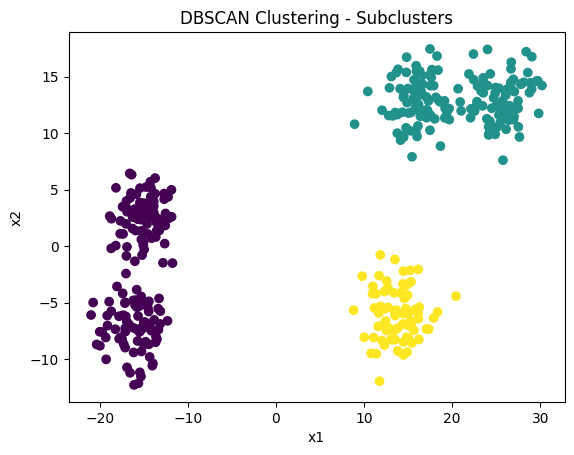

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2 -1  2  2  1  0  0  0  2

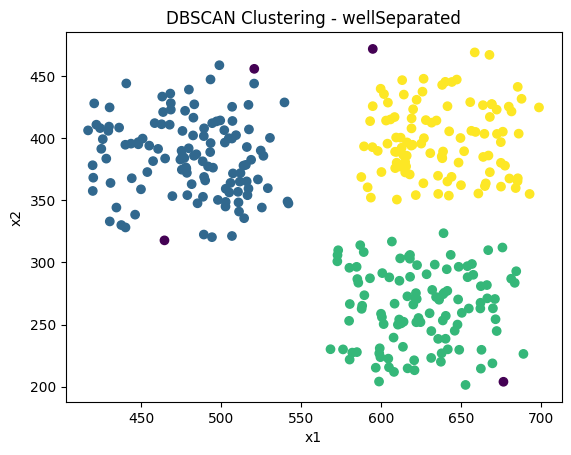

In [51]:
# DBSCAN clustering with parameter tuning
dbscan_silhouette_scores = []
dbscan_noise_counts = []

for i, data in enumerate(datasets):
    eps_values = np.linspace(1, 5, 20) if i != 3 else np.linspace(1, 29, 5)
    min_samples_values = range(1, 51)
    best_eps, best_min_samples, best_score = 0, 0, -1

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
            try:
                dbscan_model.fit(data[['x1', 'x2']])
                cluster_labels = dbscan_model.labels_
                if len(set(cluster_labels)) > 1: # and -1 not in cluster_labels:
                    silhouette_avg = silhouette_score(data[['x1', 'x2']], cluster_labels)
                    if silhouette_avg > best_score:
                        best_eps, best_min_samples, best_score = eps, min_samples, silhouette_avg
            except ValueError as e:
                print(f"Error in DBSCAN with eps={eps}, min_samples={min_samples} for {dataset_labels[i]}: {e}")

    # Final DBSCAN model with best parameters
    dbscan_model = DBSCAN(eps=best_eps, min_samples=best_min_samples)
    dbscan_model.fit(data[['x1', 'x2']])
    cluster_labels = dbscan_model.labels_
    print(cluster_labels)

    # Calculate the number of noise points
    noise_count = list(cluster_labels).count(-1)
    dbscan_noise_counts.append(noise_count)
    # dbscan_silhouette_scores.append(best_score)
    dbscan_silhouette_scores.append(best_score)

    plt.scatter(data['x1'], data['x2'], c=dbscan_model.labels_)
    plt.title(f'DBSCAN Clustering - {dataset_labels[i]}')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

In [52]:
dbscan_noise_counts

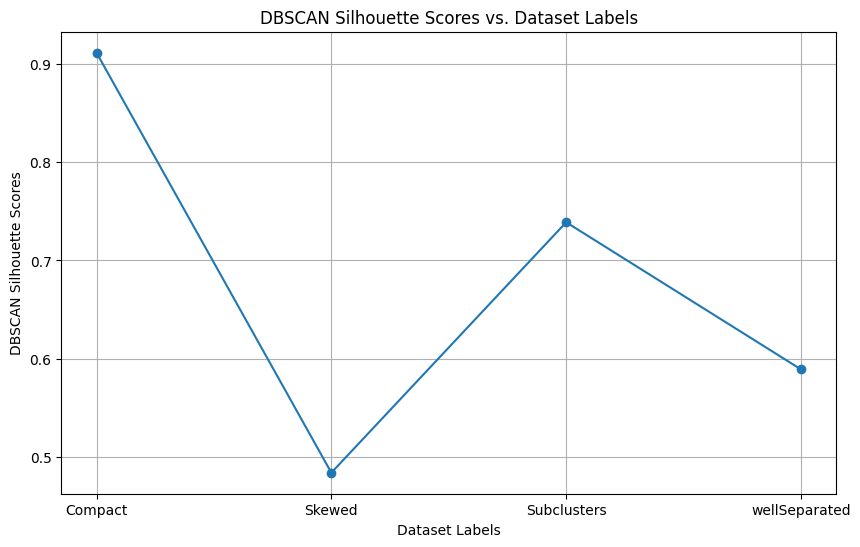

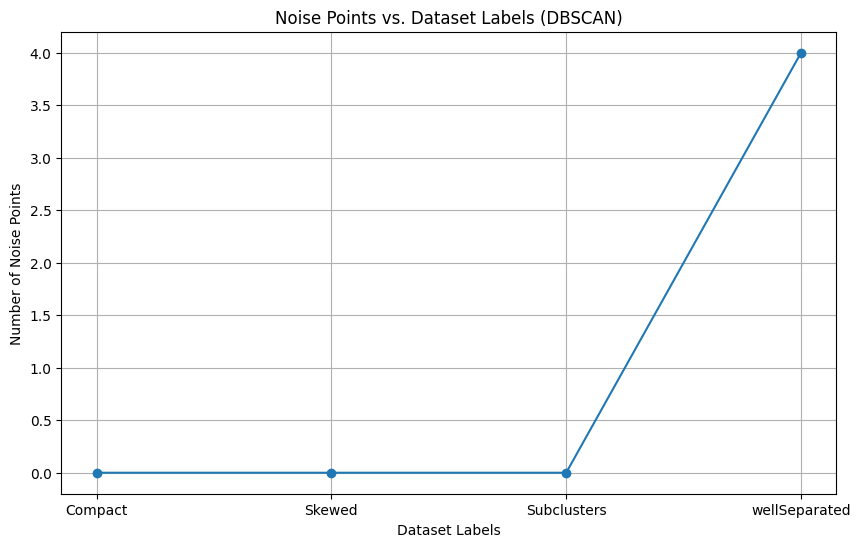

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(dataset_labels, dbscan_silhouette_scores, marker='o')
plt.xlabel("Dataset Labels")
plt.ylabel("DBSCAN Silhouette Scores")
plt.title("DBSCAN Silhouette Scores vs. Dataset Labels")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(dataset_labels, dbscan_noise_counts, marker='o')
plt.xlabel("Dataset Labels")
plt.ylabel("Number of Noise Points")
plt.title("Noise Points vs. Dataset Labels (DBSCAN)")
plt.grid(True)
plt.show()

In [54]:
# # DBSCAN clustering with parameter tuning
# # dbscan_silhouette_scores = []
# dbscan_noise_points = []

# for i, data in enumerate(datasets):
#     eps_values = np.linspace(1, 5, 20) if i != 3 else np.linspace(1, 29, 5)
#     min_samples_values = range(1, 51)
#     best_eps, best_min_samples, best_score = 0, 0, -1

#     for eps in eps_values:
#         for min_samples in min_samples_values:
#             dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
#             try:
#                 dbscan_model.fit(data[['x1', 'x2']])
#                 cluster_labels = dbscan_model.labels_

#                 # Filter out noise points (labeled as -1) for silhouette score calculation
#                 core_samples_mask = cluster_labels != -1
#                 num_noise_points = np.sum(cluster_labels == -1)

#                 if len(set(cluster_labels[core_samples_mask])) > 1:
#                     silhouette_avg = silhouette_score(data[['x1', 'x2']][core_samples_mask], cluster_labels[core_samples_mask])
#                     if silhouette_avg > best_score:
#                         best_eps, best_min_samples, best_score = eps, min_samples, silhouette_avg
#             except ValueError as e:
#                 print(f"Error in DBSCAN with eps={eps}, min_samples={min_samples} for {dataset_labels[i]}: {e}")

#     # Final DBSCAN model with best parameters
#     dbscan_model = DBSCAN(eps=best_eps, min_samples=best_min_samples)
#     dbscan_model.fit(data[['x1', 'x2']])
#     final_labels = dbscan_model.labels_
#     num_final_noise_points = np.sum(final_labels != -1)
#     # dbscan_silhouette_scores.append(best_score)

#     # Print the number of noise points for each dataset
#     print(f"Dataset {dataset_labels[i]} - Best eps: {best_eps}, Best min_samples: {best_min_samples}")
#     print(f"Number of noise points: {num_final_noise_points}")
#     dbscan_noise_points.append(num_final_noise_points)

#     # Plot the clusters ignoring noise points
#     # plt.scatter(data['x1'], data['x2'], c=final_labels)
#     # plt.title(f'DBSCAN Clustering - {dataset_labels[i]}')
#     # plt.xlabel('x1')
#     # plt.ylabel('x2')
#     # plt.show()


DBSCAN Clustering (Compact Data):
Works well as the compact clusters have consistent densities.

DBSCAN Clustering (Skewed Data):
Works well and the algorithm can handle skewed clusters better than KMeans, as it doesn't assume any specific shape.

DBSCAN Clustering (SubClusters Data):
Performs well as subclusters have sufficient density, and parameter tuning is crucial.

DBSCAN Clustering (wellSeperated): May not be the best choice for well-separated clusters but the density of points within each cluster is sufficient so it's working well. Tuning parameters is crucial.

In [55]:
# Compile silhouette scores into DataFrame for comparison
silhouette_scores_summary = pd.DataFrame({
    'Dataset': dataset_labels,
    'K-Means': kmeans_silhouette_scores,
    'Agg.Lnk.Single': single_linkage_scores,
    'Agg.Lnk.Complete': complete_linkage_scores,
    'Agg.Lnk.Average': average_linkage_scores,
    'DBSCAN': dbscan_silhouette_scores,
    'DBSCANNoisePoints': dbscan_noise_counts
})

silhouette_scores_summary



,Dataset,K-Means,Agg.Lnk.Single,Agg.Lnk.Complete,Agg.Lnk.Average,DBSCAN,DBSCANNoisePoints
0,Compact,0.911780,0.911780,0.911780,0.911780,0.911780,0
1,Skewed,0.406937,0.173779,0.292751,0.391412,0.483642,0
2,Subclusters,0.716820,0.595697,0.716513,0.690470,0.738949,0
3,wellSeparated,0.613946,0.346804,0.612632,0.613946,0.588947,4


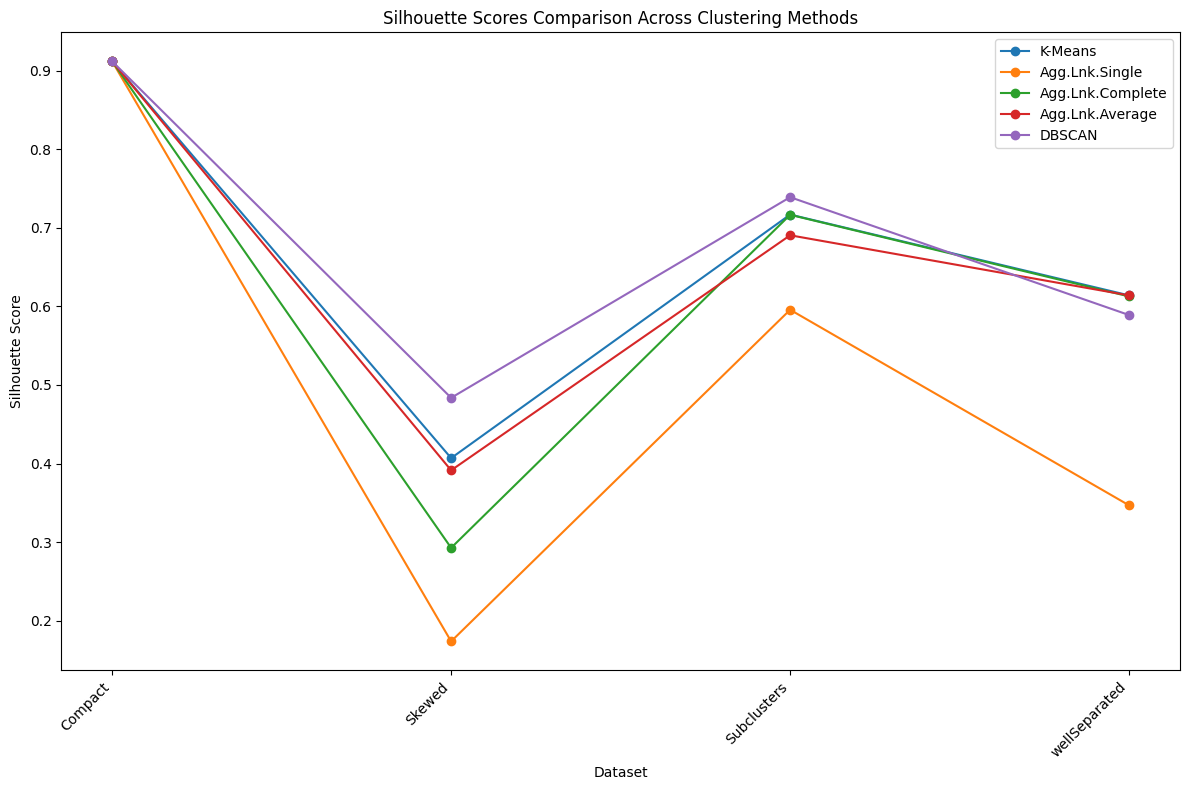

In [56]:
# Plot silhouette score comparison
plt.figure(figsize=(12, 8))
for method in silhouette_scores_summary.columns[1:-1]:
    plt.plot(silhouette_scores_summary['Dataset'], silhouette_scores_summary[method], marker='o', label=method)

plt.title('Silhouette Scores Comparison Across Clustering Methods')
plt.xlabel('Dataset')
plt.ylabel('Silhouette Score')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


DBSCAN Algorithm performs the best for almost each and every data.
